In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load datasets
s1, r1 = 1711, 63
path1 = f'../data/result/{s1}_{r1}/'
X1 = np.load(path1+'resultX.npy')

s2, r2 = 962, 153
path2 = f'../data/result/{s2}_{r2}/'
X2 = np.load(path2+'resultX.npy')

# print(X1.shape)
X1 = X1.reshape(X1.shape[0], s1+r1, 2)
X2 = X2.reshape(X2.shape[0], s2+r2, 2)
# print(X1.shape)

species = np.load(path1+'species.npy', allow_pickle=True)
region = np.load(path2+'region.npy', allow_pickle=True)

img_path = '../../latex/figures/'


In [3]:
t = 0
Xspecies = X1[:,:s1]
Xregion = X2[:, s2:]
print(Xspecies.shape)
print(Xregion.shape)

# Get the species out 

(17, 1711, 2)
(17, 153, 2)


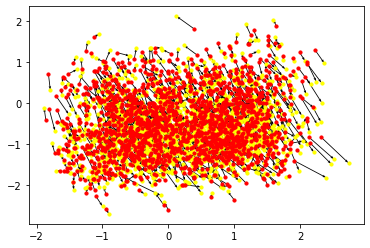

In [4]:
# Plot first and last timestep and arrow for movement
fig, ax = plt.subplots()

# to_plot = Xregion
to_plot = Xspecies

first = to_plot[0]
x1, y1 = first[:,0], first[:,1]
last = to_plot[-1]
x2, y2 = last[:,0], last[:,1]


AB = ax.scatter(x1, y1, c = 'red', marker = 'o', s = 10, zorder = 3)
CD = ax.scatter(x2, y2, c = 'yellow', marker = 'o', s = 10, zorder = 2)

ax.quiver(x1, y1, (x2-x1), (y2-y1), angles='xy', scale_units='xy', scale=1)
# plt.savefig(f'../../latex/figures/latentspace_species', dpi=600)
plt.show()



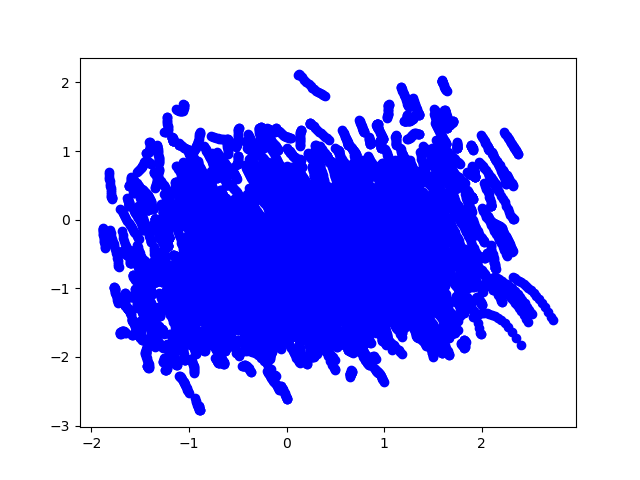

In [5]:
# Make a movie out of this
import matplotlib.animation as animation
%matplotlib widget

fig = plt.figure()

to_plot = Xspecies
imgs = []
for t in range(len(to_plot)):
    Xs_curr = Xspecies[t]
    # Xr_curr = Xregion[t]
    # fig = plt.figure() # if want to save plots
    
    im1 = plt.scatter(Xs_curr[:,0], Xs_curr[:, 1], c='blue')
    # im2 = plt.scatter(Xr_curr[:,0], Xr_curr[:, 1], c='red')
    
    # if t in [0, 5, 10, 15]:
    #     print('save image')
    #     plt.savefig(f'../../latex/figures/latentspace_species_tf{t}')
    imgs.append([im1])

ani = animation.ArtistAnimation(fig, imgs, interval=500, blit=True,
                                repeat_delay=1000)
# ani.save(img_path+'dynamic_evolution.mp4')

plt.show()

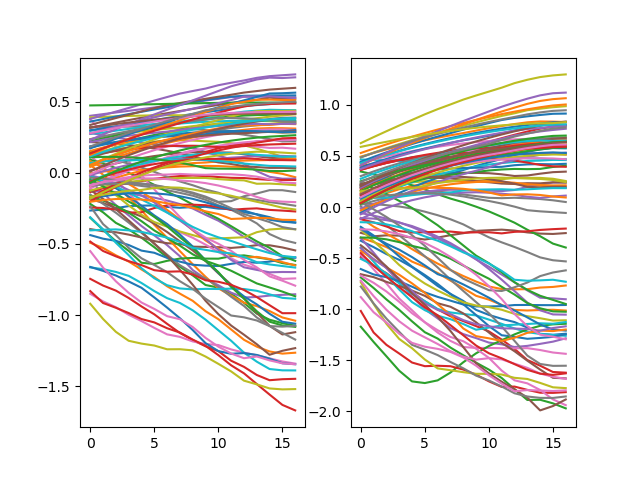

In [6]:
# Plot trajectories
# Xspecies[:,0,:]
to_plot = Xregion
fig = plt.figure()
plt.subplot(121)  
_ = plt.plot(to_plot[:, 1:100, 0])
plt.subplot(122)  # 1 row, 2 columns, Plot 2
_ = plt.plot(to_plot[:, 1:100, 1])

# plt.savefig(f'../../latex/figures/trajectories_region')

In [7]:
# Reshape into trajectories
trajS = Xspecies.transpose(1, 0, 2).reshape(Xspecies.shape[1], Xspecies.shape[0]*Xspecies.shape[2])
trajR = Xregion.transpose(1, 0, 2).reshape(Xregion.shape[1], Xregion.shape[0]*Xregion.shape[2])


In [11]:
from sklearn.cluster import OPTICS, DBSCAN, cluster_optics_dbscan

clust = OPTICS(min_samples=5)
# clust = DBSCAN(eps= 0.3, min_samples=5)
clust.fit(trajR)

OPTICS()

In [12]:
clust.labels_

array([-1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,  2, -1, -1, -1, -1, -1,
       -1, -1, -1,  3, -1, -1,  0, -1,  2, -1, -1, -1, -1,  3, -1, -1, -1,
        3, -1, -1, -1, -1,  3, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
        2, -1, -1, -1, -1,  1, -1, -1,  3, -1, -1,  1, -1, -1, -1,  2,  4,
        4, -1, -1, -1,  3, -1, -1,  3, -1, -1,  1, -1, -1,  3, -1, -1, -1,
        4, -1, -1,  4, -1, -1, -1,  2, -1,  3, -1,  4,  3, -1, -1, -1, -1])

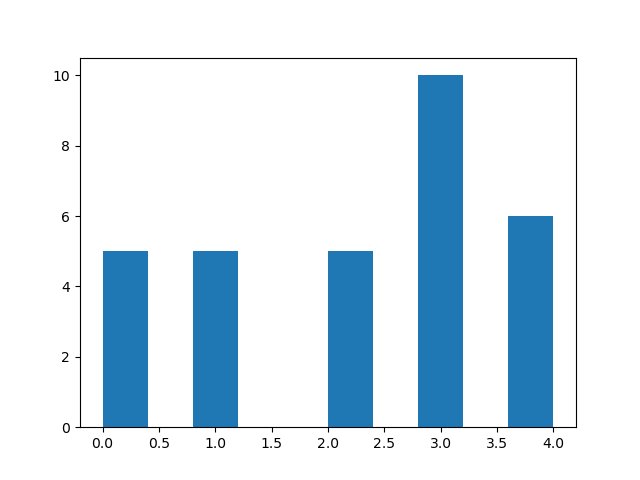

In [14]:
# Analyse size of cluster
unique, counts = np.unique(clust.labels_, return_counts=True)
clust_sz = dict(zip(unique, counts))
del clust_sz[-1]
fig = plt.figure()
mylist = [key for key, val in clust_sz.items() for _ in range(val)]
plt.hist(mylist, bins=20)
# plt.savefig(f'../../latex/figures/cluster_distribution_region')

In [15]:
from collections import Counter
c = Counter(clust_sz)
most_common = c.most_common(5)
idxs = [tuple[0] for tuple in most_common]
print(f'Most common indexes {idxs}')


Most common indexes [3, 4, 0, 1, 2]


In [16]:
Xk = to_plot[:, clust.labels_ == 2]
np.mean(Xk[0, :], axis=0)

array([0.1239445 , 0.20388193], dtype=float32)

/home/rage/anaconda3/envs/thesis/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rage/anaconda3/envs/thesis/lib/python3.10/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


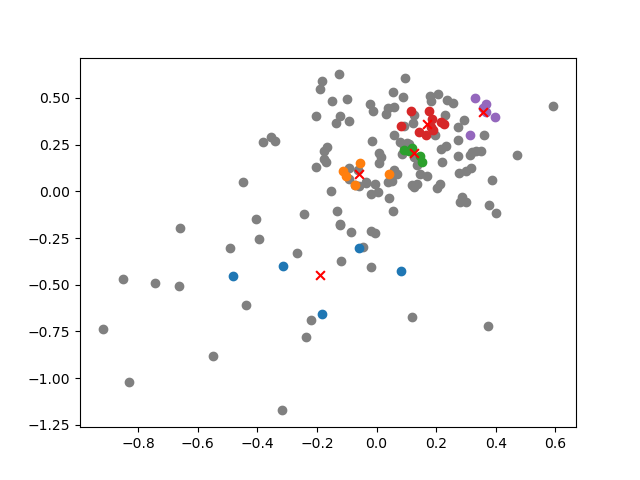

In [18]:
# Plot trajectories clusters
import matplotlib
fig = plt.figure()

to_plot = Xregion

def get_col():
    x = np.linspace(0.0, 1, 20)
    cmap = matplotlib.cm.get_cmap('nipy_spectral')
    col = cmap(x)[np.newaxis, :, :3]
    # print(col[0][0])
    return col[0]
    # cmap = cm.get_cmap(plt.get_cmap('cool'))
colors = get_col()

for klass in range(-1, 100):
    Xk = to_plot[:, clust.labels_ == klass]
    if klass == -1:
        plt.scatter(Xk[0, :, 0], Xk[0, :, 1], alpha=1, c='grey')
        # plt.scatter(Xk[0, :, 0], Xk[0, :, 1], alpha=1, color=colors[klass*2])
    else:
        # plt.scatter(Xk[0, :, 0], Xk[0, :, 1], alpha=1, color=colors[klass])
        plt.scatter(Xk[0, :, 0], Xk[0, :, 1], alpha=1)
        centroid = np.mean(Xk[0, :], axis=0)
        plt.scatter(centroid[0], centroid[1], s=40, c='r', marker='x')


plt.show()
# plt.savefig(f'../../latex/figures/cluster_2d')


In [ ]:
from dataset import InvasiveSpecies
# And this is how you get the names

InvSpec = InvasiveSpecies( '../data/GlobalAlienSpeciesFirstRecordDatabase_v2.xlsx')
InvSpec.filter_data()

In [ ]:
df = InvSpec.df 
family = df[df['TaxonName'] == 'Plum pox virus']['Family'].unique()[0]
print(family)

print(df['LifeForm'].unique()) 

In [ ]:
# Get cluster composition
from dataset import InvasiveSpecies
# And this is how you get the names

from collections import Counter
c = Counter(clust_sz)
most_common = c.most_common(5)
idxs = [tuple[0] for tuple in most_common]
print(f'Most common indexes {idxs}')

for klass in idxs:
    dict = {}

    clusterS = species[clust.labels_ == klass]
    print(f'Taxonomic families for klass {klass} with size {len(clusterS)}')
    for s in clusterS:
        # get taxonomic family of each species
        family = df[df['TaxonName'] == s]['LifeForm'].unique()[0]
        if family in dict.keys():
           dict[family] += 1 
        else:
            dict[family] = 1
    print(f'For cluster {klass}')
    
    for key, el in dict.items():
        print(key, el/len(clusterS))

In [ ]:
# Starting points

import tensorflow as tf
n = 17
time_interval = tf.constant(range(1, n+1), dtype =tf.int32)

n_nodes = 1500
d = 2
X_true = np.zeros((n, n_nodes, d))
for i in range(n_nodes):
  for j in range(d):
    X_true[ :, i, j] = (tf.keras.activations.sigmoid(np.random.uniform(-2, 2, 1)*10*(time_interval/n-np.random.uniform(0.2, 0.8, 1))) -0.5)*np.random.uniform(1, 3, 1) + np.random.uniform(-0.5, 0.5, 1)

